In [3]:
import pandas as pd
from pandas import Series,DataFrame 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

The following tasks are to be performed:
    •Read the Data from Yahoo finance website directly.
    •Perform cleaning.
    •What was the change in stock price over time?
    •Visualize the change in a stock’s volume being traded, over        time?
    •What was the moving average of various stocks? 
    •What was the daily return average of a stock?
    •Adda new column ‘Trend’ whose values are based on the 'Daily        Return'.
    •Visualize trend frequency through a Pie Chart.
    •What was the correlation between the daily returns of              different stocks?

In [4]:
!pip install --upgarde pandas
!pip install --upgrade pandas-datareader


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --upgarde


In [5]:
from pandas_datareader import data
from datetime import datetime

In [6]:
stock_list=['AAPL','GOOG','MSFT','AMZN']

In [7]:
end=datetime.today()

In [8]:
start=datetime(end.year-1,end.month,end.day)



In [9]:
for stock in stock_list:
    globals()[stock]=data.DataReader(stock,'yahoo',start,end)

In [11]:
'''data_source='yahoo'
start_date='2021-04-25'
end_date='2022-04-25'
df=web.DataReader(list(companies_dict.values()),data_source,start_date,end_date)'''

"data_source='yahoo'\nstart_date='2021-04-25'\nend_date='2022-04-25'\ndf=web.DataReader(list(companies_dict.values()),data_source,start_date,end_date)"

In [13]:
AAPL['Company']='Apple'
GOOG['Company']='Google'
AMZN['Company']='Amazon'
MSFT['Company']='Microsoft'

stocks=pd.concat([AAPL,AMZN,GOOG,MSFT])
stocks


,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2021-08-09,146.699997,145.520004,146.199997,146.089996,48908700.0,145.275940,Apple
2021-08-10,147.710007,145.300003,146.440002,145.600006,69023100.0,144.788681,Apple
2021-08-11,146.720001,145.529999,146.050003,145.860001,48493500.0,145.047226,Apple
2021-08-12,149.050003,145.839996,146.190002,148.889999,72282600.0,148.060333,Apple
2021-08-13,149.440002,148.270004,148.970001,149.100006,59375000.0,148.269165,Apple
...,...,...,...,...,...,...,...
2022-08-04,283.799988,280.170013,281.799988,283.649994,18098700.0,283.649994,Microsoft
2022-08-05,283.649994,278.679993,279.149994,282.910004,16767900.0,282.910004,Microsoft
2022-08-08,285.920013,279.320007,284.049988,280.320007,18739200.0,280.320007,Microsoft


In [14]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1016 entries, 2021-08-09 to 2022-08-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1016 non-null   float64
 1   Low        1016 non-null   float64
 2   Open       1016 non-null   float64
 3   Close      1016 non-null   float64
 4   Volume     1016 non-null   float64
 5   Adj Close  1016 non-null   float64
 6   Company    1016 non-null   object 
dtypes: float64(6), object(1)
memory usage: 63.5+ KB


In [15]:
stocks.duplicated().sum()

0

In [16]:
companies=stocks['Company'].drop_duplicates().values
print(companies)

['Apple' 'Amazon' 'Google' 'Microsoft']


In [17]:
list1=[]
for x in set(stocks.Company):
    list1.append(x)
    
print(list1)

['Amazon', 'Microsoft', 'Apple', 'Google']


<AxesSubplot:title={'center':"amazon's stock trend"}, xlabel='Date'>

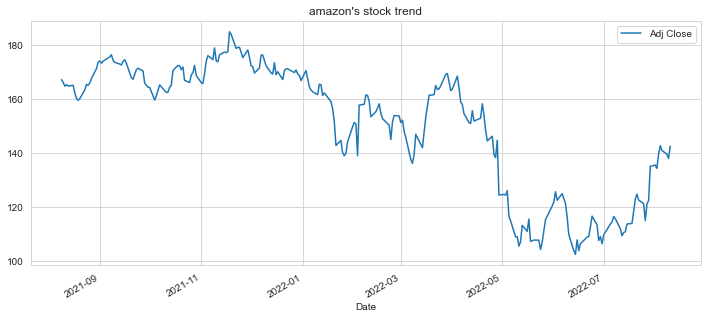

In [18]:
AMZN['Adj Close'].plot(legend=True ,figsize=(12,5),title="amazon's stock trend")

<AxesSubplot:title={'center':"MICROSOFT's stock trend"}, xlabel='Date'>

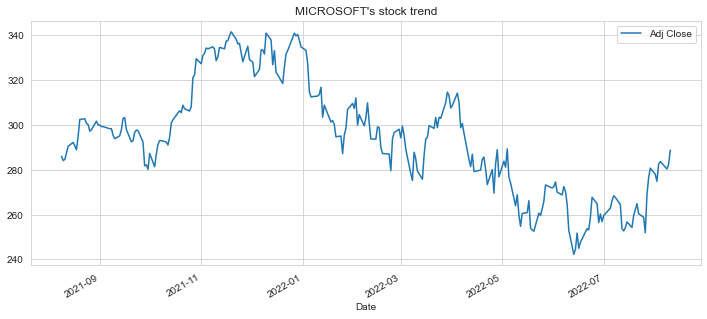

In [19]:
MSFT['Adj Close'].plot(legend=True ,figsize=(12,5),title="MICROSOFT's stock trend")

•Visualize the change in a stock’s volume being traded, over time?

<AxesSubplot:xlabel='Date'>

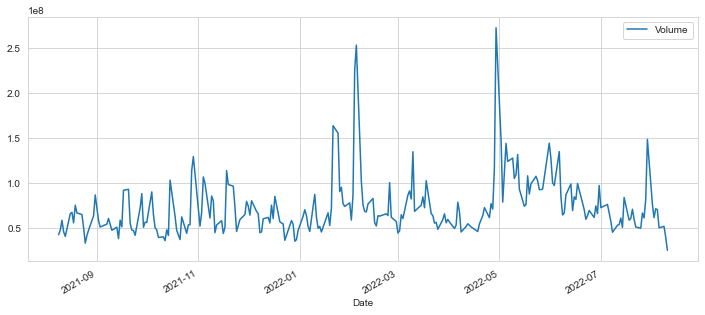

In [20]:
AMZN['Volume'].plot(legend=True,figsize=(12,5))

what was the daily return average of a stock

In [21]:
AMZN['Daily Return']=AMZN['Adj Close'].pct_change()

In [22]:
AMZN['Daily Return'].tail()

Date
2022-08-04    0.021861
2022-08-05   -0.012415
2022-08-08   -0.009872
2022-08-09   -0.011333
2022-08-10    0.033302
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

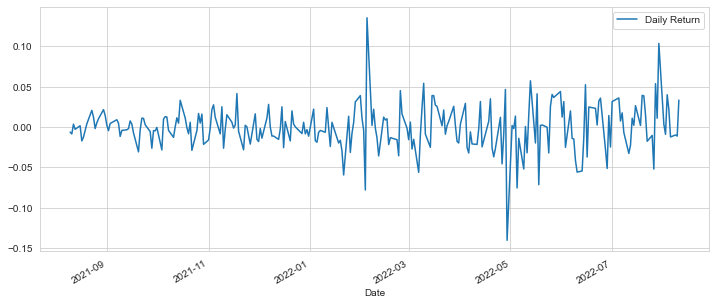

In [23]:
AMZN['Daily Return'].plot(figsize=(12,5),legend=True)

•What was the moving average of various stocks? 

In [24]:
moving_avg=[10,20,50]
for ma in moving_avg:
    column_name="MA for %s days"%(str(ma))
    AMZN[column_name]=AMZN['Adj Close'].rolling(window=ma,center=False).mean()
    


In [25]:
AMZN.head()



,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,,
2021-08-09,167.744003,166.425995,167.180496,167.093506,42964000.0,167.093506,Amazon,NaN,NaN,NaN,NaN
2021-08-10,167.899994,165.750000,167.250504,166.033997,48252000.0,166.033997,Amazon,-0.006341,NaN,NaN,NaN
2021-08-11,166.884995,163.889496,166.572495,164.605499,58944000.0,164.605499,Amazon,-0.008604,NaN,NaN,NaN
2021-08-12,165.725494,163.483505,164.500000,165.175003,46282000.0,165.175003,Amazon,0.003460,NaN,NaN,NaN
2021-08-13,165.303497,164.149994,165.283493,164.698502,41134000.0,164.698502,Amazon,-0.002885,NaN,NaN,NaN


In [26]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,,
2022-08-04,143.559998,139.550003,140.580002,142.570007,70585000.0,142.570007,Amazon,0.021861,128.821001,121.933500,116.39647
2022-08-05,142.860001,139.600006,140.100006,140.800003,50650100.0,140.800003,Amazon,-0.012415,130.659001,123.196500,117.13047
2022-08-08,144.229996,138.289993,142.050003,139.410004,52229000.0,139.410004,Amazon,-0.009872,132.486002,124.579501,117.78317
2022-08-09,138.949997,136.210007,138.050003,137.830002,40395900.0,137.830002,Amazon,-0.011333,134.788002,126.010001,118.31822
2022-08-10,144.330002,141.009995,142.899994,142.419998,25659359.0,142.419998,Amazon,0.033302,136.933002,127.611000,118.86369


<AxesSubplot:xlabel='Date'>

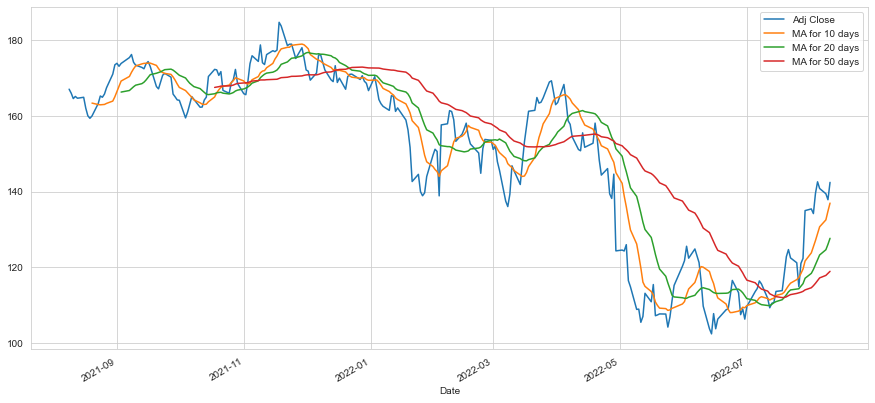

In [27]:
AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,7))

•What was the daily return average of a stock?

In [28]:
AMZN['Daily return']=AMZN['Adj Close'].pct_change()


In [29]:
AMZN['Daily return'].tail()

Date
2022-08-04    0.021861
2022-08-05   -0.012415
2022-08-08   -0.009872
2022-08-09   -0.011333
2022-08-10    0.033302
Name: Daily return, dtype: float64

<AxesSubplot:xlabel='Date'>

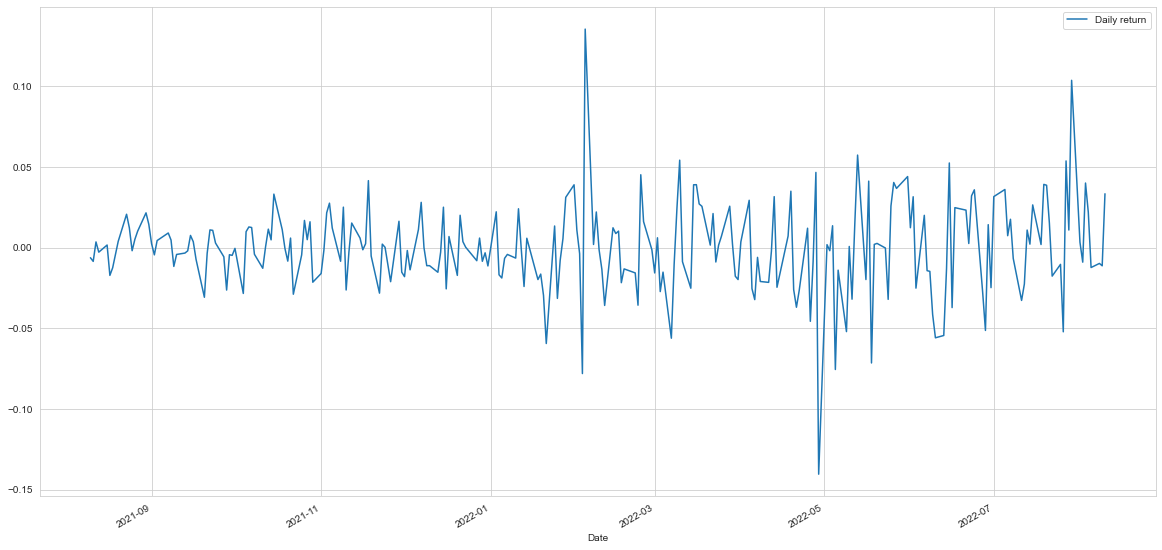

In [30]:
AMZN['Daily return'].plot(legend=True,figsize=(20,10))

Adda new column ‘Trend’ whose values are based on the 'Daily Return'

In [31]:
def trend(x):
    if x>-0.015 and x<=0.015:
        return 'slighter or no change'
    elif x>0.015 and x<=0.04:
        return 'slight positive'
    elif x<-0.015 and x>=-0.4:
        return 'slight negative'
    elif x>0.04 and x<=0.06:
        return 'positive'
    elif x<-0.04 and x>=-0.06:
        return 'negative'
    elif x>0.06 and x<=0.07:
        return 'among top gainers'
    elif x<-0.06 and x>=-0.07:
        return 'among top losers'
    elif x>0.07:
        return 'Bull run'
    elif x<=-0.07:
        return 'Bear drop'
AMZN['Trend']=np.zeros(AMZN['Daily return'].count()+1)
AMZN['Trend']=AMZN['Daily return'].apply(lambda x:trend(x))
AMZN.tail(5)
    
        

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return,MA for 10 days,MA for 20 days,MA for 50 days,Daily return,Trend
Date,,,,,,,,,,,,,
2022-08-04,143.559998,139.550003,140.580002,142.570007,70585000.0,142.570007,Amazon,0.021861,128.821001,121.933500,116.39647,0.021861,slight positive
2022-08-05,142.860001,139.600006,140.100006,140.800003,50650100.0,140.800003,Amazon,-0.012415,130.659001,123.196500,117.13047,-0.012415,slighter or no change
2022-08-08,144.229996,138.289993,142.050003,139.410004,52229000.0,139.410004,Amazon,-0.009872,132.486002,124.579501,117.78317,-0.009872,slighter or no change
2022-08-09,138.949997,136.210007,138.050003,137.830002,40395900.0,137.830002,Amazon,-0.011333,134.788002,126.010001,118.31822,-0.011333,slighter or no change
2022-08-10,144.330002,141.009995,142.899994,142.419998,25659359.0,142.419998,Amazon,0.033302,136.933002,127.611000,118.86369,0.033302,slight positive


C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily return'>

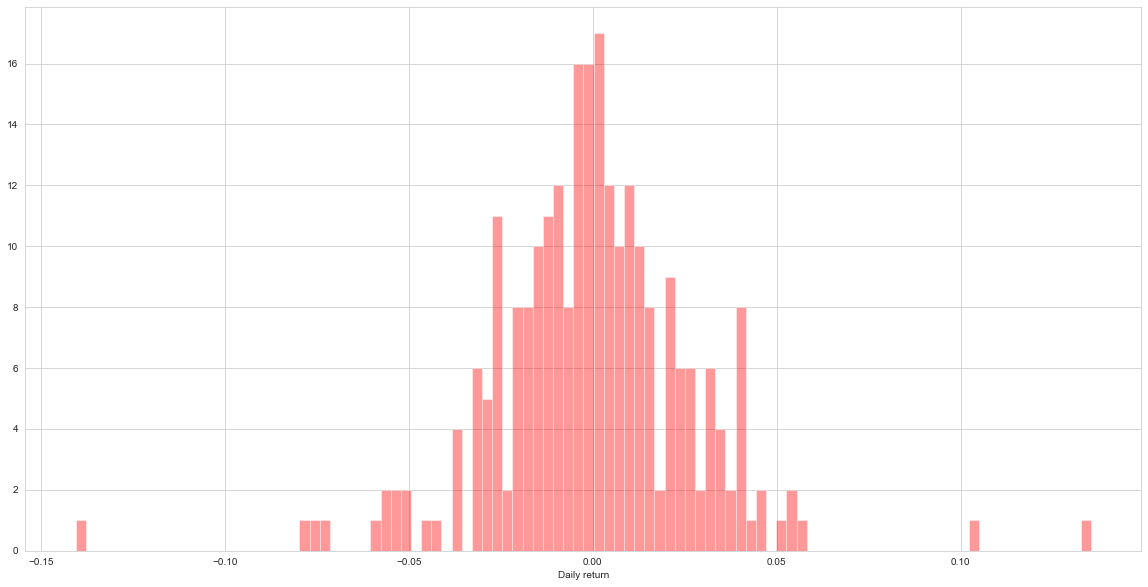

In [32]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(AMZN['Daily return'].dropna(),bins=100,color='red',ax=ax,kde=False)

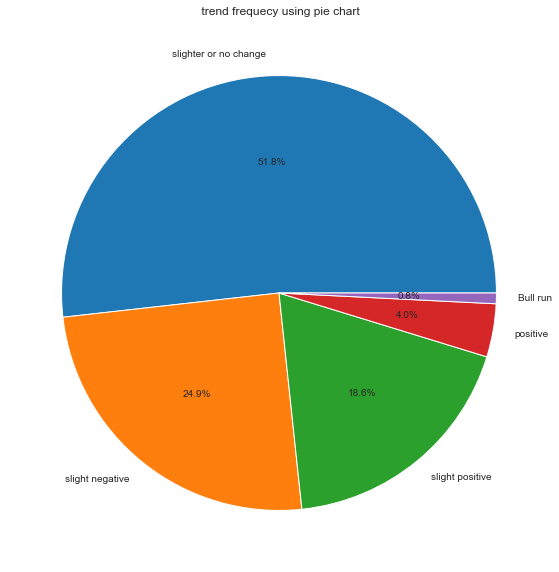

In [33]:
labels=AMZN.Trend.value_counts().index
sizes=AMZN.Trend.value_counts().values
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,autopct="%1.1f%%")
plt.title(" trend frequecy using pie chart")
plt.show()


•What was the correlation between the daily returns of different stocks?

In [34]:
all_adj = pd.concat([AAPL['Adj Close'] , GOOG['Adj Close'], AMZN['Adj Close'] ,MSFT['Adj Close']],axis = 1)
all_adj.columns =['Apple','Google','Amazon','Microsoft']
all_adj

,Apple,Google,Amazon,Microsoft
Date,,,,
2021-08-09,145.275940,138.001999,167.093506,285.994720
2021-08-10,144.788681,138.096497,166.033997,284.120026
2021-08-11,145.047226,137.689499,164.605499,284.625885
2021-08-12,148.060333,138.389496,165.175003,287.462708
2021-08-13,148.269165,138.406006,164.698502,290.478088
...,...,...,...,...
2022-08-04,165.580002,118.870003,142.570007,283.649994
2022-08-05,165.350006,118.220001,140.800003,282.910004
2022-08-08,164.869995,118.139999,139.410004,280.320007


In [36]:
pct_df=all_adj.pct_change()
pct_df.tail()

,Apple,Google,Amazon,Microsoft
Date,,,,
2022-08-04,-0.001926,0.000758,0.021861,0.004177
2022-08-05,-0.001389,-0.005468,-0.012415,-0.002609
2022-08-08,-0.002903,-0.000677,-0.009872,-0.009155
2022-08-09,0.000303,-0.005417,-0.011333,0.007063
2022-08-10,0.018524,0.033702,0.033302,0.022884


<AxesSubplot:>

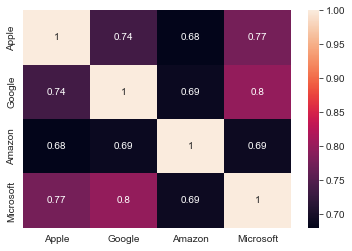

In [37]:
sns.heatmap(pct_df.corr(),annot = True)